<div style="border:solid Chocolate 2px; padding: 40px">
 
<b> Станислав, привет!👋</b> 

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом! 

Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Ты можешь реагировать на комментарии как просто написав их в Markdown-ячейках, так и выделив их цветом. Например, <font color='blue'>синим</font>. Второй способ, на мой взгляд, удобнее.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
 
<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку! 

<div class="alert alert-info">
<b>Комментарий студента:</b> Кирилл, привет! Мои комментарии будут выглядеть так </div>

### Описание проекта
Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах.
Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. - Постройте модель для такого предсказания.
Значение метрики RMSE на тестовой выборке должно быть не больше 48.

#### Инструкция по выполнению проекта
- Загрузите данные и выполните их ресемплирование по одному часу.
- Проанализируйте данные.
- Обучите разные модели с различными гиперпараметрами. Сделайте тестовую выборку размером 10% от исходных данных.
- Проверьте данные на тестовой выборке и сделайте выводы.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import TimeSeriesSplit
import copy
import warnings
warnings.filterwarnings('ignore')

### Загрузите данные и выполните их ресемплирование по одному часу.

In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data = data.resample('1H').sum()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Описание задачи есть, библиотеки загружены. Данные получены верно, даты обработаны, мы их переместили в индекс. Ресемплирование провели верно. Отлично, что используем суммирование. Такой вариант интуитивно понятен и удобен. Полет нормальный :)
</div>
 

### Проанализируйте данные.

In [3]:
#напишем функцию для обзора данных
def data_info(dataset):
    cols = dataset.columns
    colours = ['#000099', '#ffff00'] 
    sns.heatmap(dataset[cols].isnull(), cmap=sns.color_palette(colours))
    print('')
    print('Shape:')
    display(dataset.shape)
    print('')
    print('Head:')
    display(dataset.head())
    print('')
    print('Corr:')
    display(dataset.corr())
    df_plot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)      
    plt.show()
    print('')
    print('Describe:')
    print('')
    display(dataset.describe())  
    print('Info:')
    print('')
    display(dataset.info())   
    print('Duplicated:')
    #print('')
    display(dataset[dataset.duplicated ()])
    #Процентный список пропущенных данных
    print('isna:')
    print('')
    for col in data.columns:
        pct_missing = np.mean(data[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))


Shape:


(4416, 1)


Head:


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43



Corr:


,num_orders
num_orders,1.0


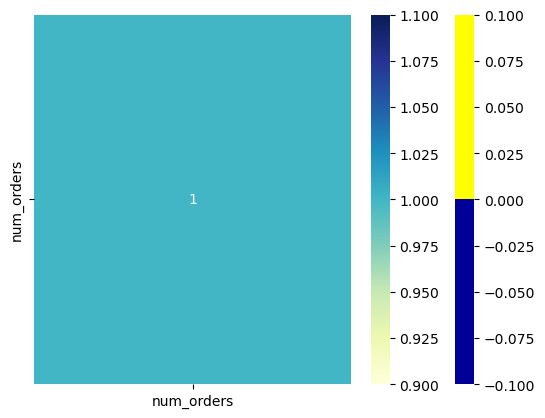


Describe:



,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


Info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


None

Duplicated:


,num_orders
datetime,
2018-03-01 15:00:00,66
2018-03-01 16:00:00,43
2018-03-01 21:00:00,66
2018-03-02 03:00:00,64
2018-03-02 06:00:00,11
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


isna:

num_orders - 0%


In [4]:
data_info(data)

In [5]:
data[data.index.min():data.index.max()]

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


 <div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Графики в проекте необходимо подписать.

</div>


<div class="alert alert-info">
<b>Комментарий студента:</b> Этот график  малоинформативен,  удалю т.к. более подробные и интересные граики у нас ниже</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь важно прокомментировать график. Виден ли тренд, есть ли ускорение, если да, с какого времени?
    
       
</div>


#### Разложение временного ряда на компоненты

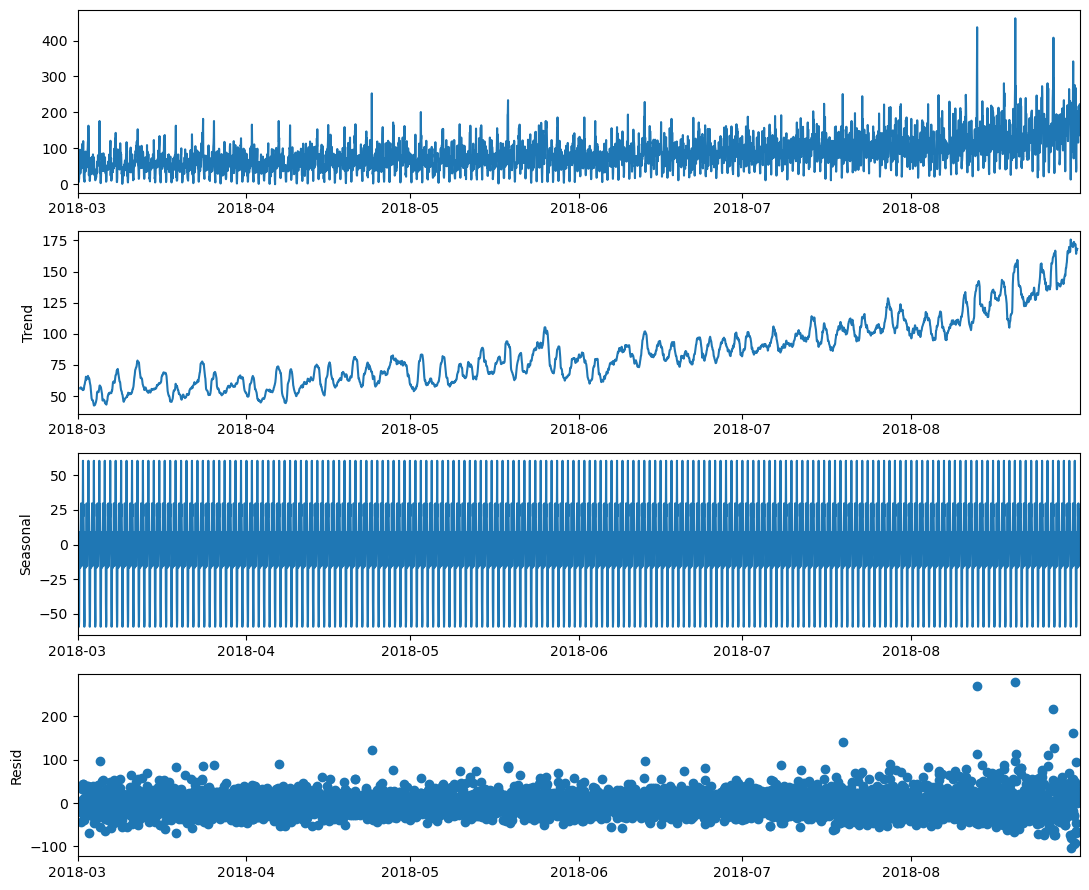

In [6]:
rcParams['figure.figsize'] = 11, 9
 
# применяем функцию к данным о перевозках
decompose = seasonal_decompose(data)
decompose.plot()
 
plt.show()

- Наблюдаем положительный рост количества заказов с 07 месяца

In [7]:
def show_graph(dataset, windowsize):
    # зададим размер графика
    plt.figure(figsize = (15,8))

    # поочередно зададим кривые 
    plt.plot(dataset, label = 'Количество заказов по часам', color = 'steelblue')
    plt.plot(dataset.rolling(window = windowsize).mean(), label = 'Скользящее среднее за {windowsize} ч.'.format(windowsize= windowsize), color = 'orange')

    # добавим легенду, ее положение на графике и размер шрифта
    plt.legend(title = '', loc = 'upper left', fontsize = 14)

    # добавим подписи к осям и заголовки
   # plt.xlabel('', fontsize = 14)
    plt.ylabel('Количество заказов', fontsize = 14)
    plt.title('Количество заказов за все время', fontsize = 16)

    # выведем обе кривые на одном графике
    plt.show()

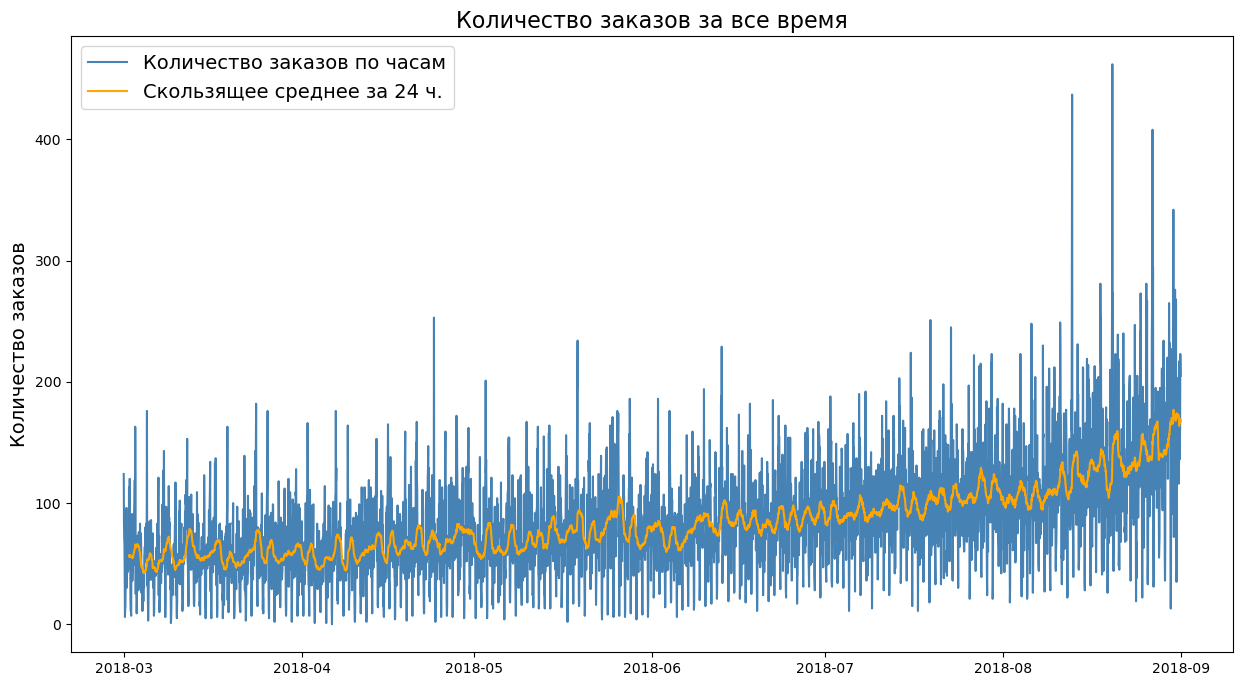

In [8]:
show_graph(data, 24)

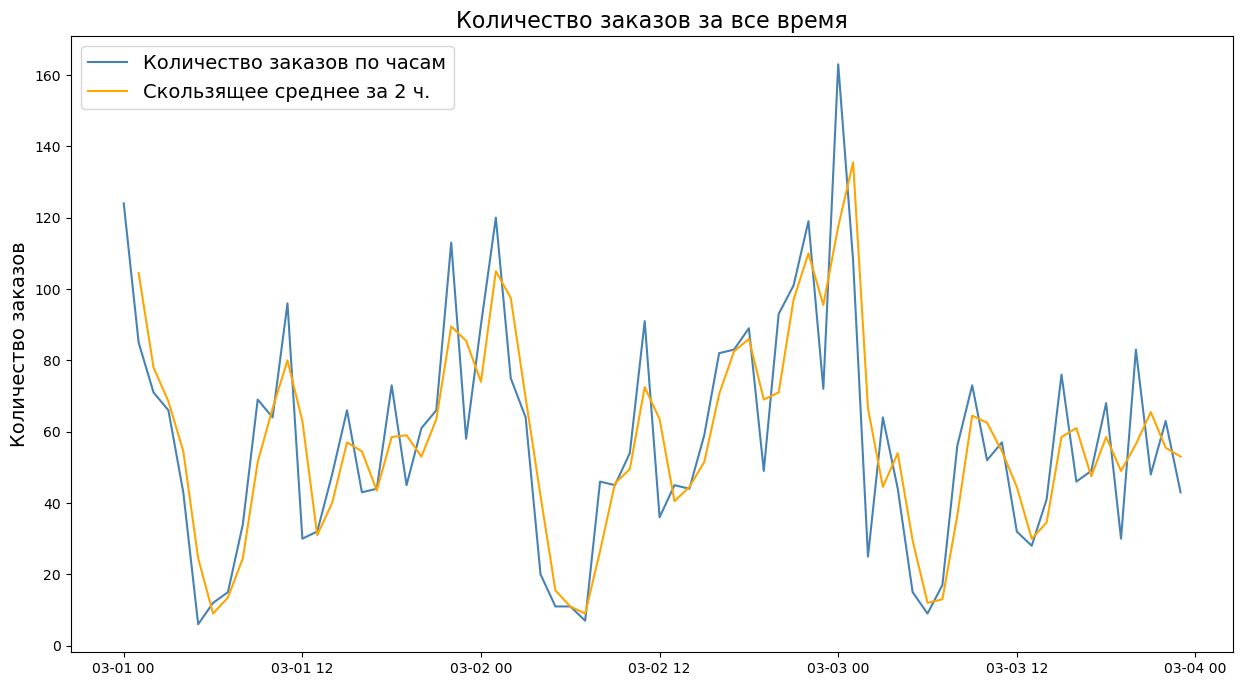

In [9]:
show_graph(data['2018-03-01':'2018-03-03'], 2)

- По графику видно  что в 5-6 утра наблюдается спад заказов, все спят, логично
- Пик заказов на 00 что вероятней всего обусловлено тем что общественный транспорт в такое время уже не работает или его значительно меньше

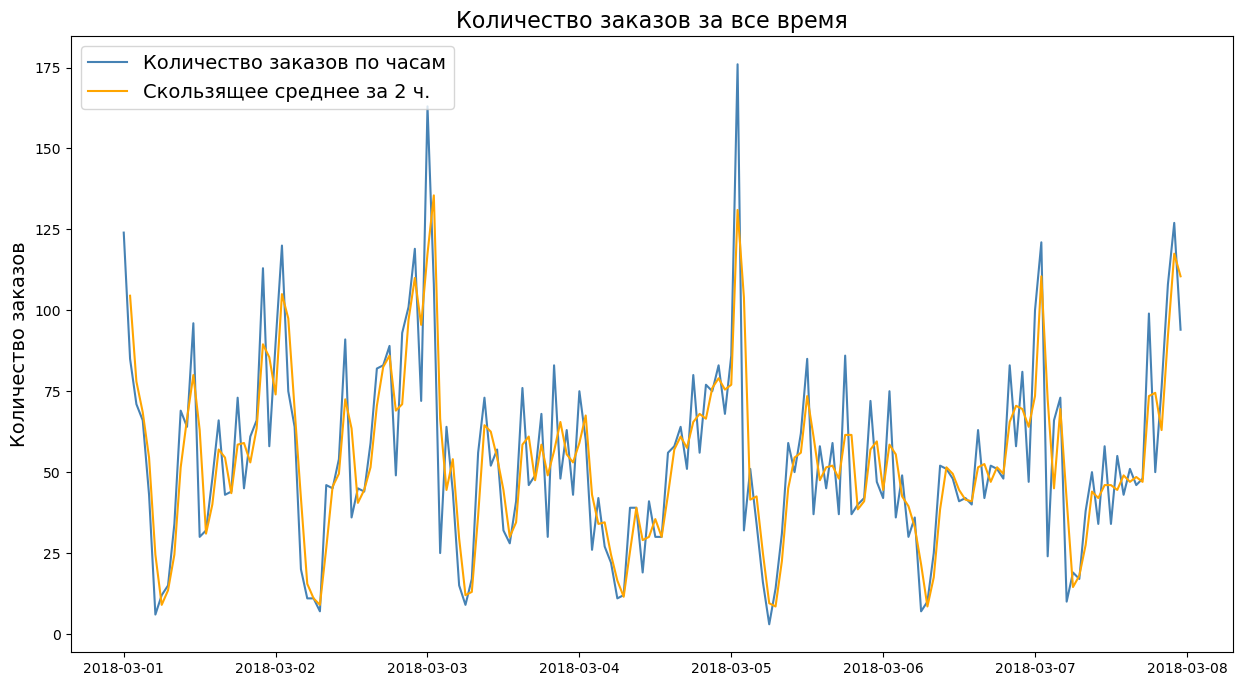

In [10]:
show_graph(data['2018-03-01':'2018-03-07'], 2)

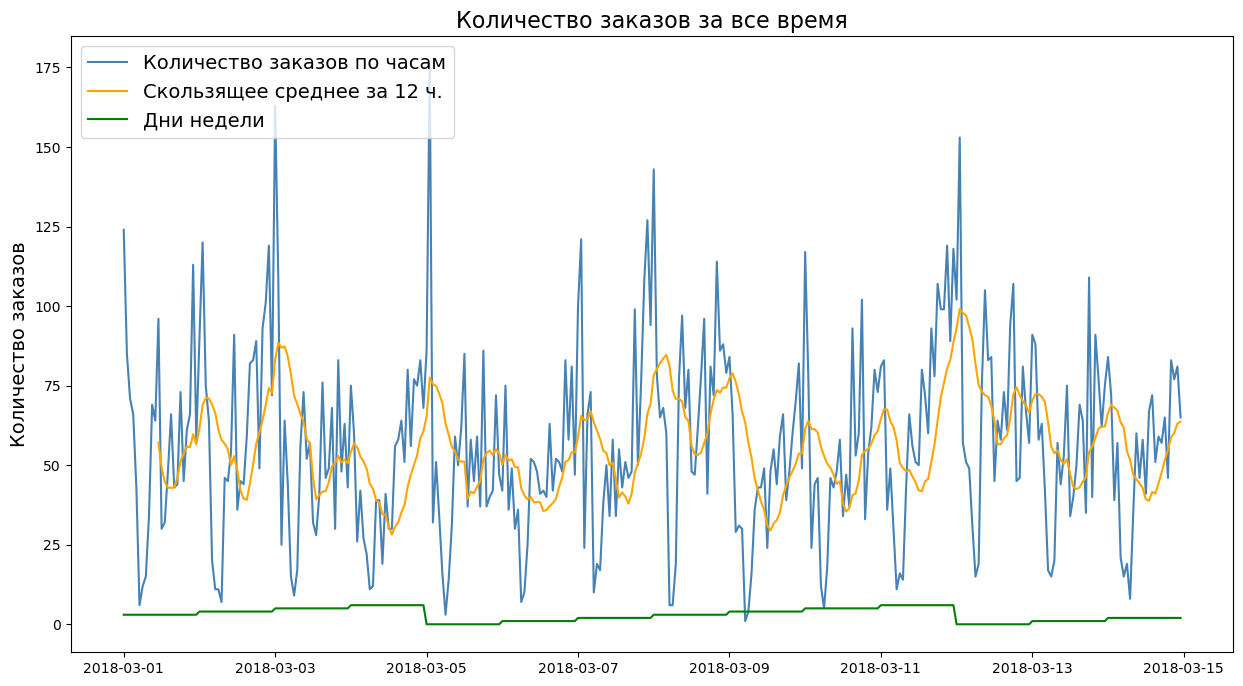

In [19]:
#Глянем по дням недели
data['dayofweek'] =  data.index.dayofweek
windowsize = 12

plt.figure(figsize = (15,8))

# поочередно зададим кривые 
plt.plot(data['2018-03-01':'2018-03-14'].num_orders, label = 'Количество заказов по часам', color = 'steelblue')
plt.plot(data['2018-03-01':'2018-03-14'].num_orders.rolling(window = windowsize).mean(), label = 'Скользящее среднее за {windowsize} ч.'.format(windowsize= windowsize), color = 'orange')
plt.plot(data['2018-03-01':'2018-03-14'].dayofweek, label = 'Дни недели', color = 'green')

# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)

# добавим подписи к осям и заголовки
plt.xlabel('', fontsize = 14)
plt.ylabel('Количество заказов', fontsize = 14)
plt.title('Количество заказов за все время', fontsize = 16)

# выведем обе кривые на одном графике
plt.show()

#### Немного кастомизировали график для того чтобы определить в какой день наибольшая нагрузка
- В последний день недели наблюдается наибольшее количество заказов

#### Результат анализа

- Один столбец и даты  в индексе
- 4416 строк
- Данные монолитны, пропусков нет
- Минимальное значение 0, максимальное 462
- Коррелировать не с чем
- С датасетом можно работать
- Промежуток дат с 2018-03-01 00:00:00 по 2018-08-31 23:00:00
- Годовую сезонность определить не получится ввиду того что срез небольшой
- По графикам видно что спрос на такси растет  ночью (с 00) и падает к утру (около 6 утра)
- Недельный тренд показывает  наибольшее количество заказов в последний день недели, минимальный не так ярко выражен, где-то среда-четверг
- С 2017 года наблюдаем положительную динамику количества заказов

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В целом все верно и круто, что смотришь на данные в меньшем масштабе.
    
«Сезонность определить не получится ввиду того что срез небольшой» - если речь идет о годовой сезонности - согласен, если о суточной и недельной - можно взять еще уже промежуток и посмотреть точнее. Можно описать, когда у нас пик и спад заказов по часам, по дням недели.
       
</div>


<div class="alert alert-info">
<b>Комментарий студента:</b> По часам пик и спад был, добавил  по дням недели</div>

### Обучите разные модели с различными гиперпараметрами. Сделайте тестовую выборку размером 10% от исходных данных.

In [12]:
#Над данными мы еще немного поработаем добавив фич:
#dayofweek добавили раньше
df = copy.copy(data) 
def make_features(dataset, max_lag, rolling_mean_size):
    #dataset['year'] = dataset.index.year
    #dataset['month'] = dataset.index.month
    dataset['day'] = dataset.index.day
    #dataset['dayofweek'] = dataset.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        dataset['lag_{}'.format(lag)] = dataset['num_orders'].shift(lag)

    dataset['rolling_mean'] = dataset['num_orders'].shift().rolling(rolling_mean_size).mean()


make_features(df, 168, 1)

train, test = train_test_split(df, test_size = 0.1, shuffle=False)
train = train.dropna()

train_x = train.drop(['num_orders'], axis = 1)
train_y = train['num_orders']

test_x = test.drop(['num_orders'], axis = 1)
test_y = test['num_orders']


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Все ли признаки нам пригодятся? Модель учится на обобщениях, поэтому те признаки, которые мы покажем ей один раз будут бесполезны. У нас данные за какой период? Важен ли год и месяц?

</div>


<div class="alert alert-info">
<b>Комментарий студента:</b> Dayofweek добавляю раньше, поэтому закоментировал, фактически остался из нужных только день</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Верно, ничего не перемешиваем.
</div>



<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Можно кратко пояснить, почему выбрали именно такое количество лагов? Как видим из анализа, у нас есть суточная и недельная сезонность. Можно предположить, что нам будет особенно интересен для предсказания лаг предыдущего часа, лаг того же часа (и предыдущего) вчерашнего и позавчерашнего дня, дня неделю назад. Я бы вообще попробовал вариант с количеством лагов в 24*7 (168 или около того).
       
</div>


<div class="alert alert-info">
<b>Комментарий студента:</b> Поправил лаг на 168, посмотрим что получится</div>

#### LinearRegression

In [54]:
model = LinearRegression()


parametrs = { 'fit_intercept': [True, False],
              'n_jobs': [1, 50, 100],
              'positive': [True, False]}

#clf.get_params().keys()
tscv = TimeSeriesSplit(n_splits=5)
grid = GridSearchCV(model, parametrs, cv=tscv)
grid.fit(train_x, train_y)
display(grid.best_params_)

{'fit_intercept': False, 'n_jobs': 1, 'positive': True}

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>

Мы здесь используем обычную кросс-валидацию, которая, соответственно, предсказывает нам будущее только в одном из n_splits случае, а в остальных − прошлое.
    
В случае с временным рядом нам нужно задать кросс-валидацию TimeSeriesSplit
    
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html 
    
В случае временного ряда в каждом сплите тестовые индексы должны быть позже по времени, чем обучающие, поэтому перетасовка обычным способом неуместна. Как раз TimeSeriesSplit решает эту проблему.
    
Схематично работу можно представить вот так:\
</font>
![image.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_013.png)

А по реализации будет очень похоже на обычную кросс-валидацию:
```python
tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
gsearch.fit(X, y)
```


</div>


<div class="alert alert-info">
<b>Комментарий студента:</b> Поправил</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Почти бюрократический комментарий, но для чистоты эксперимента нам важно обращаться к тестовой выборке только на моменте тестирования. Мы выбираем лучшую модель, подбираем к ней лучшие гиперпараметры. Если это оправданно, можно на тесте посмотреть несколько моделей, но там мы делаем ровно одно действие - смотрим, какие результаты модель будет давать на реальных данных. Важно логически разделять исследовательскую часть с подбором моделей, параметров итд, и тестовую.

</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Передвинул результаты RMSE  с параметрами по всем моделям ниже</div>

#### MLPRegressor

In [16]:
'''
model = MLPRegressor()


parametrs = { 'hidden_layer_sizes': [50, 100],
              #'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'max_iter': [1, 200, 400]}

#clf.get_params().keys()
tscv = TimeSeriesSplit(n_splits=5)
grid = GridSearchCV(model, parametrs, cv=tscv)
grid.fit(train_x, train_y)
display(grid.best_params_)
'''

"\nmodel = MLPRegressor()\n\n\nparametrs = { 'hidden_layer_sizes': [50, 100],\n              #'activation': ['identity', 'logistic', 'tanh', 'relu'],\n              'max_iter': [1, 200, 400]}\n\n#clf.get_params().keys()\ntscv = TimeSeriesSplit(n_splits=5)\ngrid = GridSearchCV(model, parametrs, cv=tscv)\ngrid.fit(train_x, train_y)\ndisplay(grid.best_params_)\n"

- Учится долго, поэтому закоментировал, вот параметры чтобы не ждать:
{'hidden_layer_sizes': 50, 'max_iter': 200}

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично. я бы убрал предупреждения. `warnings.filterwarnings('ignore')` после `import warnings`.
</div>

 <div class="alert alert-info">
<b>Комментарий студента:</b> Убрал</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В случае с временными рядами модель также будет особенной, она будет предсказывать следующее значение предыдущим:


`pred_previous = target_test.shift()
pred_previous.iloc[0] = target_train.iloc[-1]`

</div>
    
<div class="alert alert-info">
<b>Комментарий студента:</b> К сожалению не понял относительно какой модели этот коментарий </div>    


### Проверьте данные на тестовой выборке и сделайте выводы.

In [14]:
model = LinearRegression(fit_intercept = False, n_jobs = 1, positive = True)
model.fit(train_x, train_y)

test_pred = model.predict(test_x)
linear = mean_squared_error(test_y, test_pred, squared= False)
display("RMSE тестовой выборки: ", linear)

'RMSE тестовой выборки: '

34.844166242987804

In [17]:
model = MLPRegressor(hidden_layer_sizes = 50, max_iter =  200)
model.fit(train_x, train_y)

test_pred = model.predict(test_x)
mlpc =  mean_squared_error(test_y, test_pred, squared= False)
display("RMSE тестовой выборки: ", mlpc)

'RMSE тестовой выборки: '

34.623032851021584

In [18]:
model = DummyRegressor()
model.fit(train_x, train_y)

test_pred = model.predict(test_x)
dummy =  mean_squared_error(test_y, test_pred, squared= False)
display("RMSE тестовой выборки: ", dummy)

'RMSE тестовой выборки: '

83.97941361168559

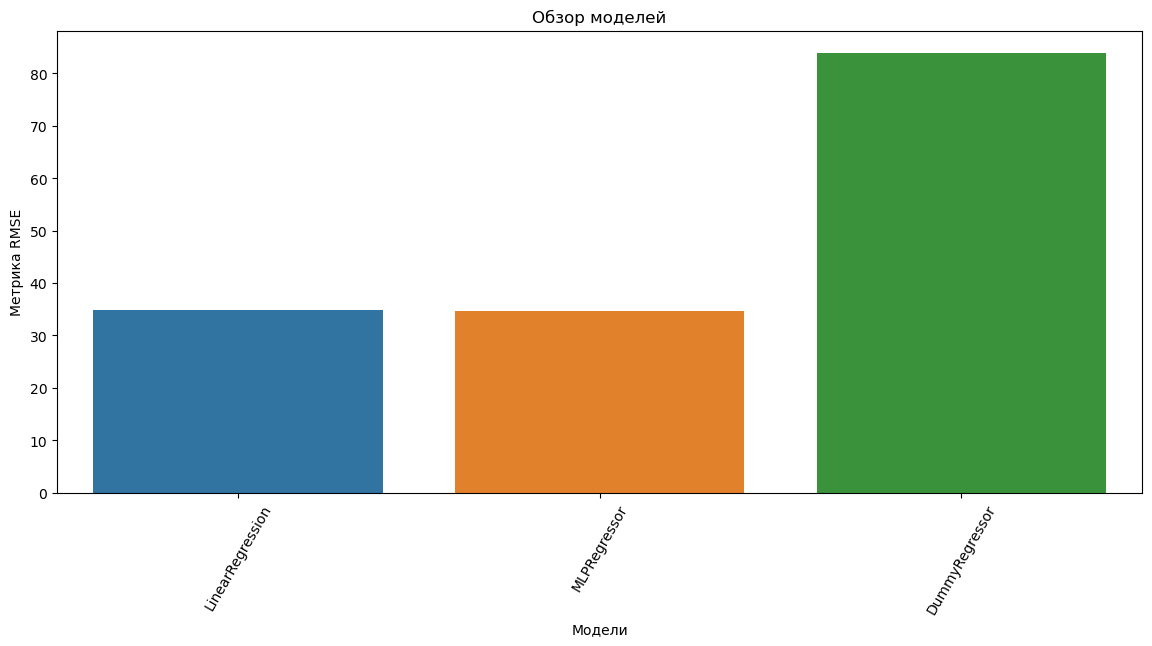

,model_name,rmse
0,LinearRegression,34.844166
1,MLPRegressor,34.623033
2,DummyRegressor,83.979414


In [20]:
modelnames = ['LinearRegression','MLPRegressor','DummyRegressor']
model_rmse = [linear, mlpc, dummy]
models_df = pd.DataFrame({'model_name':modelnames,'rmse':model_rmse})  

plt.figure(figsize=(14,6))
sns.barplot(x=models_df.model_name ,y=models_df.rmse)
plt.title("Обзор моделей")
plt.xlabel("Модели")
plt.ylabel("Метрика RMSE")
plt.xticks(rotation=60)
plt.show()
cols = ['model_name', 'rmse']
display(models_df[cols])
    

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Необходимо достичь нужного качества <48, нужно пересчитать дамми-модель.

</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Дамми то зачем?  Она же для сравнения! Сравниваются две модели, линейной регрессии и многослойного перцептрона. </div>

### Вывод

- В данные были добавлены значения временного сдвига размером от 1 до 168 и размер скользящего окна с вычслением среднего значения размером 1 
- Были обучены 2 модели и подобраны оптимальные параметры с помощью GridSearchCV
- Наименьшее значение rmse у линейной регрессии
- Наибольшее у DummyRegressor
- Регресионная модель многослойного перцептрона в даннос случае показала данные rmse чуть выше линейной регрессии. 
- Я расчитывал что нейросеть покажет лучшие характеристики, но как оказалось не всегда нужно  выбирать сложные и громоздкие модели

 <div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Выводы необходимо будет перепроверить и синхронизировать с решениями по коду.
       
</div>


<div class="alert alert-info">
<b>Комментарий студента:</b> Выводы поправил, дамми из моделей убрал </div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Мне было интересно следить за ходом мыслей и твоими решениями. Есть несколько важных моментов, которые необходимо улучшить. Их ты найдешь в разноцветных комментариях.
    
**Отмечу положительные моменты проекта🚀**
    
* Неплохой и достаточно подробный исследовательский анализ.
* Хороший выобр моделей.
    
**На что стоит обратить внимание🤔**
    
* Нужно выбрать только те фичи, которые нам нужны.
* Нужно использовать кросс-валидацию для временных рядов.
* Нужно использовать дамми-модель для временных рядов.
* Тестовую выборку трогаем только на этапе тестирования. Смотрим лучшую модель.
* Рекомендую попробовать создать больше лагов (в хорошем смысле).
* Эти и остальные замечания я также написал по ходу проекта.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>